# <center> Basic Image Preprocessing </center>

___

#### Get the current working directory

In [1]:
import os
PATH = os.getcwd()

#### Define the data path

In [2]:
DATA_PATH = os.path.join(PATH, 'data')

DATA_PATH

'C:\\Users\\Gunjan\\Downloads\\Convulated-Neural-Network-master\\Convulated-Neural-Network-master\\data'

#### Get the list of folders inside data path

In [3]:
data_dir_list = os.listdir(DATA_PATH)

if '.DS_Store' in data_dir_list :
    data_dir_list.remove('.DS_Store')

print(data_dir_list)

['Dogs', 'Cats', 'Humans', 'Horses']


#### Required variables declaration and initialization

In [11]:
img_rows, img_cols, num_channel = 224, 224, 3

num_epoch=100
batch_size=32

#### Read the images and store them in the list

In [3]:
# pip install opencv-python
import cv2

img_data_list = []

for class_folder in data_dir_list:
    
    path = DATA_PATH + '/' + class_folder
    img_list = os.listdir(path)
    
    print ('Loading {} images from {} folder\n'.format(len(img_list), path)) 
    
    for img in img_list:
        
        input_img = cv2.imread(path + '/' + img)
        
        input_img_resize = cv2.resize(input_img, (img_rows, img_cols))
        
        img_data_list.append(input_img_resize)

NameError: name 'data_dir_list' is not defined

#### Get the number of classes

In [6]:
num_classes = len(data_dir_list)
print(num_classes)

4


####  Image preprocessiong

In [7]:
import numpy as np

img_data = np.array(img_data_list)

img_data.shape

(808, 224, 224, 3)

#### Normalize the data

In [8]:
img_data = img_data/255

#### Convert class labels to numeric using one-hot encoding

In [ ]:
import numpy as np
np.arange(4)

In [ ]:
np.repeat(np.arange(4), 202)

In [9]:
from keras.utils import to_categorical

classes = np.repeat(np.arange(4), 202)
classes = to_categorical(classes)

classes

Using TensorFlow backend.


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

#### Split the dataset

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img_data, classes, test_size = 0.2, random_state = 123)

print(y_train.shape, y_test.shape)

(646, 4) (162, 4)


####  Defining the model

In [4]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (img_rows, img_cols, num_channel), 
                 activation = 'relu', ))

model.add(Conv2D(32, (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 64)        0         
__________

####  Compile the model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ["accuracy"])

In [16]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_2',
    'trainable': True,
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
 

In [17]:
model.layers

In [18]:
model.layers[0].get_config()

{'name': 'conv2d_1',
 'trainable': True,
 'batch_input_shape': (None, 224, 224, 3),
 'dtype': 'float32',
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [19]:
model.layers[0].input_shape

(None, 224, 224, 3)

In [20]:
model.layers[0].output_shape

(None, 222, 222, 32)

In [21]:
model.layers[0].trainable

True

#### Training/fit the model 

In [22]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = batch_size, epochs = 1)


Train on 646 samples, validate on 162 samples
Epoch 1/1
646/646 [==============================] - 167s 259ms/step - loss: 2.0615 - acc: 0.2817 - val_loss: 1.3874 - val_acc: 0.2099


In [23]:
y_test.shape

(162, 4)

#### Evaluating the model

`model.metrics_names` gives the output labels

In [24]:
model.metrics_names

['loss', 'acc']

In [25]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 13s 80ms/step


[1.3874175489684681, 0.20987654320987653]

In [26]:
print(model.predict(X_test[0:5]))
print(model.predict_classes(X_test[0:5]))
print(y_test[0:5])

[[0.25132006 0.252907   0.24944529 0.24632761]
 [0.2513177  0.25291494 0.24944162 0.24632572]
 [0.25131118 0.25291353 0.2494512  0.24632403]
 [0.2513198  0.25291312 0.24944179 0.2463253 ]
 [0.2513177  0.25291494 0.24944162 0.24632572]]
[1 1 1 1 1]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


#### Predict and compute the confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
print(confusion_matrix(np.argmax(y_test, axis = 1), y_pred))

[[ 0 42  0  0]
 [ 0 34  0  0]
 [ 0 38  0  0]
 [ 0 48  0  0]]


#### Saving and loading model and weights

In [29]:
from keras.models import model_from_json, load_model

- Model Graph

In [30]:
# Serialize model graph to JSON
model_json = model.to_json()

# write to directory
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Load json and create model
json_file = open('model.json', 'r')

# read json from directory
loaded_model_json = json_file.read()

json_file.close()

# load from json
loaded_model = model_from_json(loaded_model_json)

- Model Weights

In [31]:
# Serialize weights to H5
model.save_weights("model.h5")

# Load weights into new model
loaded_model.load_weights("model.h5")

In [32]:
# Serialize weights to HDF5
model.save('model.hdf5')

# Load weights into new model
loaded_model = load_model('model.hdf5')

# <center> Image Augmentation using ImageDataGenerator class </center>

___

- `ImageDataGenerator` : Generates batches of tensor image data with real-time data augmentation.

keras.preprocessing.image.ImageDataGenerator(...)

Few frequently used parameters:

- rotation_range (Int) : Degree range for random rotations.
- width_shift_range (Float) : 1-D array-like or int
- height_shift_range  : 1-D array-like or int
- shear_range (Float) : Shear Intensity (Shear angle in counter-clockwise direction in degrees)
- zoom_range (Float  or [lower, upper]) : Range for random zoom. 
- horizontal_flip (Boolean) : Randomly flip inputs horizontally.
- vertical_flip (Boolean) : Randomly flip inputs vertically.
- rescale (rescaling factor) : If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (before applying any other transformation).
- validation_split (Float) : Fraction of images reserved for validation (strictly between 0 and 1).

#### Create the Image Data Generator

In [33]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, 
                              shear_range = 0.5, zoom_range = 0.4, rescale = 1./255,
                              validation_split = 0.2, vertical_flip = True, horizontal_flip = True) 


### 1. Using .flow 

Takes data & label arrays, generates batches of augmented data.

keras.preprocessing.image.flow(...)
    
Some frequently used parameters :

- x     : Input data. Numpy array of rank 4 or a tuple. 
- y     : Labels.
- subset: Subset of data ("training" or "validation") if  validation_split is set in ImageDataGenerator.
    

Use flow() to generate Train images in batches.

In [34]:
ftrain_generator = data_gen.flow( X_train, y_train, batch_size = batch_size)

Use flow() to generate Test images in batches.

In [35]:
ftest_generator = data_gen.flow( X_test, y_test, batch_size = batch_size)

Fit the model using fit_generator() function and using the augmented images generated by flow() function 

#### fit_generator:
    
- Trains the model on data generated batch-by-batch by a Python generator (or an instance of Sequence).
- The generator is run in parallel to the model, for efficiency. For instance, this allows you to do real-time data augmentation on images on CPU in parallel to training your model on GPU.

In [36]:
X_train.shape[0]/batch_size

20.1875

In [37]:
model.fit_generator(ftrain_generator, validation_data = ftest_generator, epochs = 1, 
                    steps_per_epoch = X_train.shape[0]/batch_size, 
                    validation_steps = X_test.shape[0]/batch_size) 

Epoch 1/1
21/20 [===============================] - 235s 11s/step - loss: 1.3862 - acc: 0.2508 - val_loss: 1.3879 - val_acc: 0.2099


#### Evaluate the model

In [38]:
model.evaluate_generator(ftest_generator, steps = ftest_generator.n/batch_size)

[1.3878523155494973, 0.20987654320987653]

#### Predict on the augmented test set & find the value of Classes of augmented test set

In [39]:
model.predict_generator(ftest_generator, steps = ftest_generator.n/batch_size).argmax(axis = -1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

#### Predict and compute the confusion matrix

In [40]:
print( confusion_matrix( np.argmax(y_test, axis = 1), np.argmax( model.predict(X_test), axis = 1) ) )

[[ 0 42  0  0]
 [ 0 34  0  0]
 [ 0 38  0  0]
 [ 0 48  0  0]]


### 2. Using flow_from_directory()

Takes the path to a directory & generates batches of augmented data.
    
keras.preprocessing.image.flow_from_directory(...)
    
- directory: Path to the target directory. 
- target_size: The dimensions to which all images found will be resized e.g.(256, 256).
- color_mode: One of "grayscale", "rbg". Default: "rgb". 
- class_mode:Determines the type of label arrays that are returned:m
- batch_size: Size of the batches of data (default: 32).
- save_to_dir:This allows you to optionally specify a directory to which to save the augmented pictures being generated.
- save_prefix: Str. Prefix to use for filenames of saved pictures.
- save_format: One of "png", "jpeg".
- subset: Subset of data ("training" or "validation") if  validation_split is set in ImageDataGenerator.

Read training Images in batches for Image Augmentation

In [41]:
DATA_PATH

'/Users/shreyasi25/Downloads/20190727_Batch60_CSE7321c_Lab04_CNN/data'

Path to save Augmented Images

In [42]:
TRN_AUGMENTED = os.path.join(PATH , 'Trn_Augmented_Images')
TST_AUGMENTED = os.path.join(PATH , 'Tst_Augmented_Images')

In [43]:
train_generator = data_gen.flow_from_directory(DATA_PATH, target_size = (img_rows, img_cols), 
                                               batch_size = batch_size, 
                               class_mode = 'categorical', color_mode = 'rgb',  
                                               subset = "training", 
                               save_to_dir = TRN_AUGMENTED, save_prefix = 'TrainAugmented', 
                                               save_format = 'png')



Found 648 images belonging to 4 classes.


Classes will be automatically assigned based on the folder structure

In [44]:
train_generator.class_indices

{'Cats': 0, 'Dogs': 1, 'Horses': 2, 'Humans': 3}

Read testing Images in batches for Image Augmentation 



_Note_: 

    In real situations test data images if augmentation is not required, since we need the original image for prediction 
    Use ImageDatagenerator class only for standardization as commented below:
>testdatagen = ImageDataGenerator(rescale=1./255) 

In [45]:
test_generator = data_gen.flow_from_directory(DATA_PATH, target_size = (img_rows, img_cols), batch_size = batch_size, 
                              class_mode = 'categorical', color_mode = 'rgb',  subset = "validation",
                              save_to_dir = TST_AUGMENTED, save_prefix = 'TestAugmented', save_format = 'png')

Found 160 images belonging to 4 classes.


In [46]:
test_generator.class_indices

{'Cats': 0, 'Dogs': 1, 'Horses': 2, 'Humans': 3}

Fit the model

In [47]:
model.fit_generator(train_generator, validation_data = test_generator, epochs = 1,
                    steps_per_epoch = train_generator.n/batch_size, validation_steps = test_generator.n/batch_size)

Epoch 1/1
21/20 [===============================] - 202s 10s/step - loss: 1.4393 - acc: 0.2830 - val_loss: 1.3865 - val_acc: 0.2500


In [48]:
train_generator

#### Evaluate the model 

Use evaluate_generator

In [49]:
model.evaluate_generator(test_generator, steps = test_generator.n/batch_size)

[1.3881173133850098, 0.20625]

##### Predict 

Using predict_generator:
    
    Generates predictions for the input samples from a data generator.

In [50]:
#Predict the classes of Validation data

model.predict_generator(test_generator, steps = test_generator.n/batch_size).argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

# <center> Transfer Learning </center>

___

### VGG Architecture

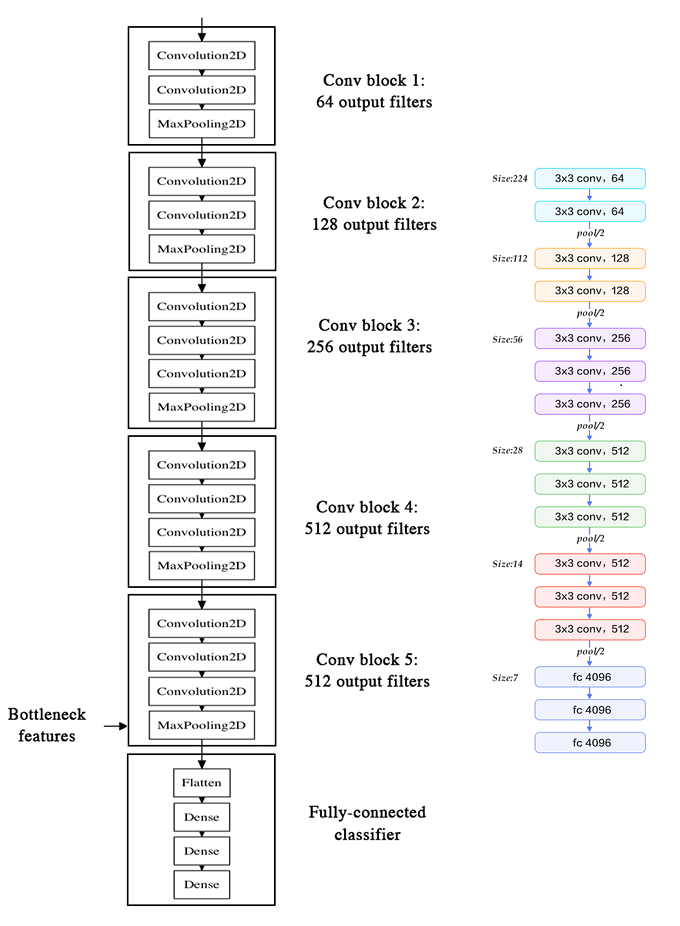

In [51]:
from IPython.display import Image
Image(filename='vgg16.png')

#### Import pre-trained VGG Network from Keras

- include_top: whether to include the 3 fully-connected layers at the top of the network.

- weights: one of None (random initialization) or 'imagenet' (pre-training on ImageNet).

- input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.

- classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.


In [12]:
from keras.applications.vgg16 import VGG16

image_input = Input( shape = (img_rows, img_cols, num_channel) )

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Custom VGG Model

In [16]:
last_layer = model.get_layer('fc2').output

out = Dense(num_classes, activation='softmax', name='output')(last_layer)

#### Training the classifier alone

In [18]:
custom_vgg_model = Model(image_input, out)

for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [20]:
custom_vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [58]:
custom_vgg_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [59]:
custom_vgg_model.fit(X_train, y_train, batch_size = batch_size, epochs = 1, validation_data = (X_test, y_test))

Train on 646 samples, validate on 162 samples
Epoch 1/1
646/646 [==============================] - 636s 985ms/step - loss: 1.9322 - acc: 0.3328 - val_loss: 1.6108 - val_acc: 0.2963


#### Evaluate the model 

In [60]:
custom_vgg_model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)

162/162 [==============================] - 129s 797ms/step


[1.610797291920509, 0.2962962962962963]

#### Predict the class

In [61]:
print(confusion_matrix( np.argmax(y_test, axis = 1), np.argmax( custom_vgg_model.predict(X_test), axis = 1) ) )

[[ 0  0  0 42]
 [ 0  0  0 34]
 [ 0  0  0 38]
 [ 0  0  0 48]]


### Transfer Learning - II

#### Training the feature extraction also

In [62]:
last_layer = model.get_layer('block5_pool').output

x = Flatten(name = 'flatten')(last_layer)
x = Dense(128, activation = 'relu', name = 'fc1')(x)
x = Dense(128, activation = 'relu', name = 'fc2')(x)

out = Dense(num_classes, activation = 'softmax', name = 'output')(x)

#### Freeze all the layers except the dense layers

In [64]:
custom_vgg_model2 = Model(image_input, out)

for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

In [65]:
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [66]:
custom_vgg_model2.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [67]:
hist = custom_vgg_model2.fit(X_train, y_train, batch_size = batch_size, epochs = 1, validation_data = (X_test, y_test))


Train on 646 samples, validate on 162 samples
Epoch 1/1
646/646 [==============================] - 670s 1s/step - loss: 1.7341 - acc: 0.4551 - val_loss: 1.2049 - val_acc: 0.4444


#### Evaluate the model 

In [68]:
custom_vgg_model2.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)

162/162 [==============================] - 109s 674ms/step


[1.2048826511995292, 0.4444444444444444]

#### Predict the class

In [69]:
print(confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(custom_vgg_model2.predict(X_test), axis = 1)))

[[37  5  0  0]
 [21 13  0  0]
 [16  6 16  0]
 [ 2 40  0  6]]
